<a href="https://colab.research.google.com/github/champsleague/Machine-Learning-Projects/blob/main/ML_phw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyclustering

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [2]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()


# # Checking for the labels in the categorical parameters 
# print(df['ocean_proximity'].unique())

# #Checking for the label counts in the categorical parameters 
# df['ocean_proximity'].value_counts()

# df = pd.get_dummies(df, columns = ['ocean_proximity'])
# df


# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df


# # scale features
# scaler = StandardScaler()
# model = scaler.fit(df)
# df_standard = model.transform(df)
# print(df_standard,'\n\n')

# # scale features
# scaler = MinMaxScaler()
# model=scaler.fit(df)
# df_minmax=model.transform(df)
# print(df_minmax,'\n\n')

# # scale features
# scaler = MaxAbsScaler()
# model=scaler.fit(df)
# df_maxabs=model.transform(df)
# print(df_maxabs,'\n\n\n')

# # scale features
# scaler = RobustScaler()
# model=scaler.fit(df)
# df_robust=model.transform(df)
# print(df_robust,'\n\n\n')

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())
df_normalize


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_prox_n
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.75
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.25
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.25
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.25
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.25


In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())


# # Building KMeans model with K=4 (Training and Predicting)
# # Instantiating
# kmeans4 = KMeans(n_clusters = 4)

# # Training the model
# kmeans4.fit(df)

# # predicting
# y_pred = kmeans4.fit_predict(df)
# print(y_pred)

# # Storing the y_pred values in a new column
# df['Cluster'] = y_pred+1 #to start the cluster number from 1

# plt.figure(figsize=(12,6))
# sns.set_palette("pastel")
# sns.scatterplot(x=df['longitude'], y = df['latitude'], hue=df['population'],palette='bright')


# generate some data
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3)
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(df)

# Assign a label to each sample
labels = gmm.predict(df)

df['labels']= labels
d0 = df[df['labels']== 0]
d1 = df[df['labels']== 1]
d2 = df[df['labels']== 2]
 
# plot three clusters in same plot
plt.scatter(d0.iloc[0], d0.iloc[5], c ='r')
plt.scatter(d1.iloc[0], d1.iloc[5], c ='yellow')
plt.scatter(d2.iloc[0], d2.iloc[5], c ='g')


CPU times: user 23.3 s, sys: 73.5 ms, total: 23.3 s
Wall time: 23.5 s


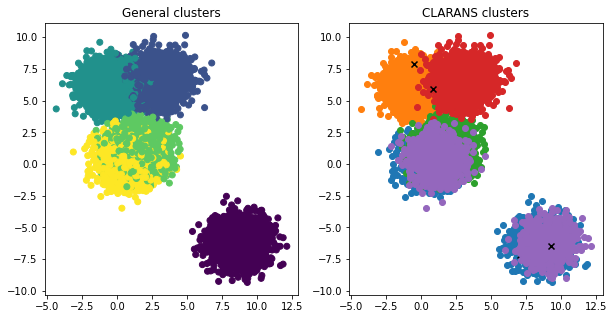

In [11]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())




from pyclustering.cluster.clarans import clarans
from sklearn.datasets import make_blobs

# synthetic clusters
df,c = make_blobs(10302,n_features=36,centers=5)

# implement clarans
clarans_instance = clarans(df.tolist(), 5, 2, 4);
%time clarans_instance.process()
clusters = clarans_instance.get_clusters()
medoids = clarans_instance.get_medoids()

fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(df[:,2],df[:,1],c=c)
axs[0].set_title('General clusters')
axs[1].set_title('CLARANS clusters')
for c_,m in zip(clusters,medoids):
    axs[1].scatter(df[c_,2],df[c_,1])
    axs[1].scatter(df[m,2],df[m,1],marker='x',c='black',label='medoids')


In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())

# Reducing the dimensionality of the data to make it visualizable
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_


# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()


colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
		X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ','Label 4',
			'Label 5', 'Label -1'),
		scatterpoints = 1,
		loc ='upper left',
		ncol = 3,
		fontsize = 8)
plt.show()


In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth

df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())
df1 = df.drop(df.index[3000:20000])
df1

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(df1)
print('cluster labels types:', np.unique(cluster_labels))


bandwidth = estimate_bandwidth(df1,quantile=0.25)
print('bandwidth valule:', round(bandwidth,3))

clusterDF = pd.DataFrame(data=df1, columns=['ftr1','ftr2'])
# clusterDF['target'] = y

# # calculate best bandwidth with estimate_bandwidth()
# best_bandwidth = estimate_bandwidth(df1, quantile=0.25)

# meanshift= MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(df1)
print('cluster labels type:',np.unique(cluster_labels)) 


clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # Apply scatter plot with different markers for each cluster
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k')
    
    # Centralized visualization by cluster
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9)
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k')
    
plt.show()